HOUSEHOLD CONSUMPTION EXPENDITURE SURVEY (HCES) ANALYSIS

1. BASIC DATA INFORMATION
Dataset Shape: (209396, 55)

Data Sample:
                                  HH_ID  Sector  State  NSS-Region  District  \
0   HCES2022699591212130623068221111306       1     21         213         6   
1   HCES2022325492191931132028219201301       2     19         193        11   
2   HCES2022331532151510322037115101308       2     15         151         3   
3   HCES2022622821121210923037212102315       1     12         121         9   
4  HCES20223918022929318420110229101301       2     29         293        18   

   Household Type  Religion of the head of the household  \
0               6                                      1   
1               1                                      1   
2               2                                      3   
3               1                                      6   
4               9                                      1   

   Social Group of the head of t

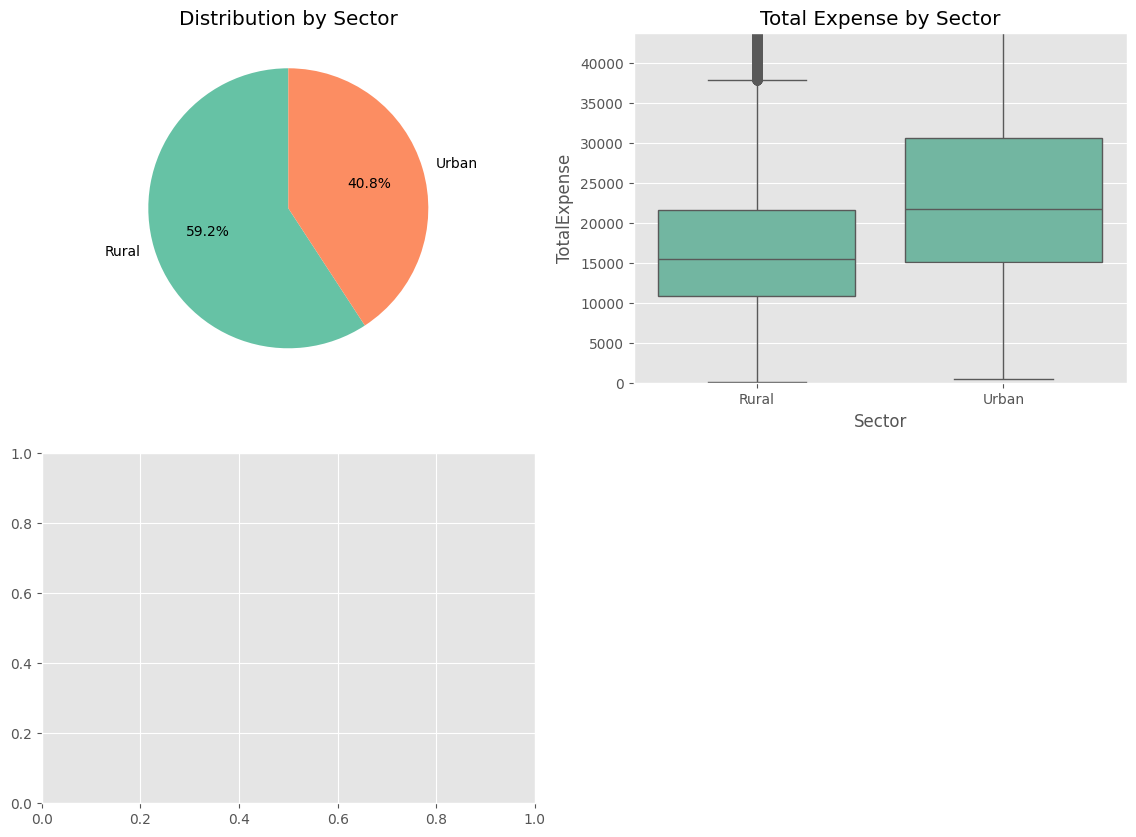

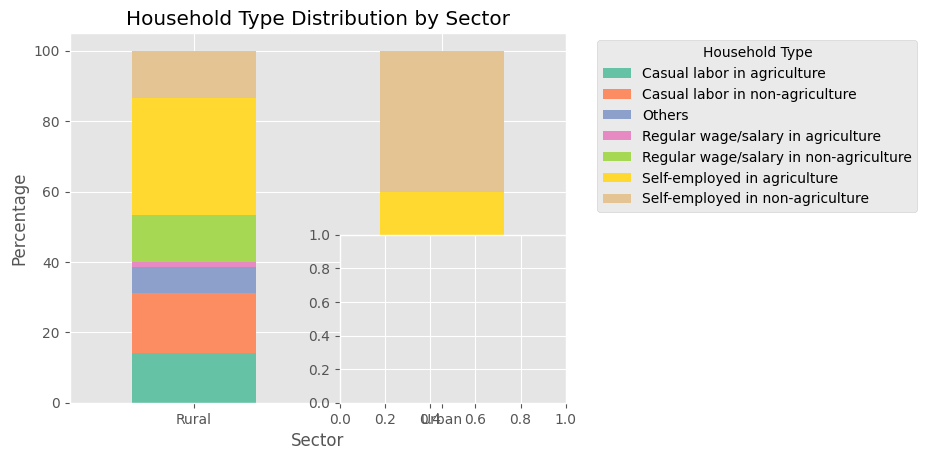

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load the data with the correct filename
df = pd.read_csv('Merged_household_data.csv')

# Setting the style for plots
plt.style.use('ggplot')
sns.set_palette("Set2")

print("="*50)
print("HOUSEHOLD CONSUMPTION EXPENDITURE SURVEY (HCES) ANALYSIS")
print("="*50)

# 1. Basic data information
print("\n1. BASIC DATA INFORMATION")
print(f"Dataset Shape: {df.shape}")
print("\nData Sample:")
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Data types
print("\nData Types:")
print(df.dtypes)

# Basic statistics
print("\nSummary Statistics for Numerical Variables:")
print(df.describe())

# Convert categorical columns
# Mapping for Sector
if df['Sector'].dtype != 'object':
    df['Sector'] = df['Sector'].map({1: 'Rural', 2: 'Urban'})

# Mapping for Household Type (based on the provided information)
household_type_mapping = {
    1: 'Self-employed in agriculture',
    2: 'Self-employed in non-agriculture',
    3: 'Regular wage/salary in agriculture',
    4: 'Regular wage/salary in non-agriculture',
    5: 'Casual labor in agriculture',
    6: 'Casual labor in non-agriculture',
    9: 'Others'
}

if df['Household Type'].dtype != 'object':
    df['Household Type'] = df['Household Type'].map(household_type_mapping)

# Religion mapping
religion_mapping = {
    1: 'Hinduism',
    2: 'Islam',
    3: 'Christianity',
    4: 'Sikhism',
    5: 'Jainism',
    6: 'Buddhism',
    7: 'Zoroastrianism',
    9: 'Others',
    0: 'Not reported'
}

if df['Religion of the head of the household'].dtype != 'object':
    df['Religion of the head of the household'] = df['Religion of the head of the household'].map(religion_mapping)

# Social Group mapping
social_group_mapping = {
    1: 'Scheduled Tribe (ST)',
    2: 'Scheduled Caste (SC)',
    3: 'Other Backward Class (OBC)',
    9: 'Others',
    0: 'Not reported'
}

if df['Social Group of the head of the household'].dtype != 'object':
    df['Social Group of the head of the household'] = df['Social Group of the head of the household'].map(social_group_mapping)

# 2. Target Variable Analysis (TotalExpense)
print("\n2. TARGET VARIABLE ANALYSIS (TOTAL EXPENSE)")

plt.figure(figsize=(12, 6))

# Distribution of TotalExpense
plt.subplot(1, 2, 1)
sns.histplot(df['TotalExpense'], kde=True)
plt.title('Distribution of Total Household Expense')
plt.xlabel('Total Expense')
plt.ylabel('Frequency')

# Log transformation for better visualization
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['TotalExpense']), kde=True)
plt.title('Distribution of Log(Total Household Expense)')
plt.xlabel('Log(Total Expense)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('total_expense_distribution.png')
plt.close()

# Summary statistics for TotalExpense
print("\nSummary Statistics for Total Expense:")
print(df['TotalExpense'].describe())

# Check for outliers
Q1 = df['TotalExpense'].quantile(0.25)
Q3 = df['TotalExpense'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nIQR: {IQR}")
print(f"Lower Bound (Q1 - 1.5*IQR): {Q1 - 1.5*IQR}")
print(f"Upper Bound (Q3 + 1.5*IQR): {Q3 + 1.5*IQR}")
print(f"Potential Outliers: {df[(df['TotalExpense'] < Q1 - 1.5*IQR) | (df['TotalExpense'] > Q3 + 1.5*IQR)].shape[0]}")

# 3. Household Type Analysis
print("\n3. HOUSEHOLD TYPE ANALYSIS")

plt.figure(figsize=(14, 10))

# Distribution of Household Types
plt.subplot(2, 2, 1)
household_counts = df['Household Type'].value_counts()
sns.barplot(x=household_counts.index, y=household_counts.values)
plt.title('Distribution of Household Types')
plt.xticks(rotation=90)
plt.ylabel('Count')

# TotalExpense by Household Type
plt.subplot(2, 2, 2)
sns.boxplot(x='Household Type', y='TotalExpense', data=df)
plt.title('Total Expense by Household Type')
plt.xticks(rotation=90)
plt.ylim(0, df['TotalExpense'].quantile(0.95))  # Limiting y-axis for better visualization

# Log transformed expense by Household Type
plt.subplot(2, 2, 3)
sns.boxplot(x='Household Type', y=np.log1p(df['TotalExpense']), data=df)
plt.title('Log(Total Expense) by Household Type')
plt.xticks(rotation=90)

# Mean expense by Household Type
plt.subplot(2, 2, 4)
household_mean = df.groupby('Household Type')['TotalExpense'].mean().sort_values(ascending=False)
sns.barplot(x=household_mean.index, y=household_mean.values)
plt.title('Mean Total Expense by Household Type')
plt.xticks(rotation=90)
plt.ylabel('Mean Total Expense')

plt.tight_layout()
plt.savefig('household_type_analysis.png')
plt.close()

# Statistical summary by household type
print("\nStatistical Summary by Household Type:")
household_stats = df.groupby('Household Type')['TotalExpense'].describe()
print(household_stats)

# 4. Rural vs Urban Comparison
print("\n4. RURAL VS URBAN COMPARISON")

plt.figure(figsize=(14, 10))

# Distribution by Sector
plt.subplot(2, 2, 1)
sector_counts = df['Sector'].value_counts()
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Sector')

# TotalExpense by Sector
plt.subplot(2, 2, 2)
sns.boxplot(x='Sector', y='TotalExpense', data=df)
plt.title('Total Expense by Sector')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

# Household Type distribution by Sector
plt.subplot(2, 2, 3)
sector_household = pd.crosstab(df['Sector'], df['Household Type'])
sector_household_pct = sector_household.div(sector_household.sum(axis=1), axis=0) * 100
sector_household_pct.plot(kind='bar', stacked=True)
plt.title('Household Type Distribution by Sector')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Household Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mean TotalExpense by Sector and Household Type
plt.subplot(2, 2, 4)
sector_household_expense = df.groupby(['Sector', 'Household Type'])['TotalExpense'].mean().unstack()
sector_household_expense.plot(kind='bar')
plt.title('Mean Total Expense by Sector and Household Type')
plt.ylabel('Mean Total Expense')
plt.xticks(rotation=0)
plt.legend(title='Household Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('rural_urban_comparison.png')
plt.close()

# Statistical tests for rural vs urban
print("\nStatistical Summary by Sector:")
sector_stats = df.groupby('Sector')['TotalExpense'].describe()
print(sector_stats)

# 5. Electronic Appliances Analysis
print("\n5. ELECTRONIC APPLIANCES ANALYSIS")

appliance_cols = [
    'Is_HH_Have_Television', 'Is_HH_Have_Radio', 'Is_HH_Have_Laptop_PC',
    'Is_HH_Have_Mobile_handset', 'Is_HH_Have_Bicycle', 'Is_HH_Have_Motorcycle_scooter',
    'Is_HH_Have_Motorcar_jeep_van', 'Is_HH_Have_Trucks', 'Is_HH_Have_Animal_cart',
    'Is_HH_Have_Refrigerator', 'Is_HH_Have_Washing_machine', 'Is_HH_Have_Airconditioner_aircooler'
]

plt.figure(figsize=(14, 10))

# Appliance Ownership Distribution
plt.subplot(2, 2, 1)
appliance_counts = df[appliance_cols].sum().sort_values(ascending=False)
sns.barplot(x=appliance_counts.index, y=appliance_counts.values)
plt.title('Electronic Appliance Ownership')
plt.xticks(rotation=90)
plt.ylabel('Count')

# Correlation between appliance ownership and total expense
plt.subplot(2, 2, 2)
appliance_corr = df[appliance_cols + ['TotalExpense']].corr()['TotalExpense'].sort_values(ascending=False)[:-1]
sns.barplot(x=appliance_corr.index, y=appliance_corr.values)
plt.title('Correlation with Total Expense')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')

# Appliance ownership by sector
plt.subplot(2, 2, 3)
appliance_sector = pd.melt(df, id_vars=['Sector'], value_vars=appliance_cols, var_name='Appliance', value_name='Has_Appliance')
sns.barplot(x='Appliance', y='Has_Appliance', hue='Sector', data=appliance_sector)
plt.title('Appliance Ownership by Sector')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.legend(title='Sector')

# Appliance count per household
df['Appliance_Count'] = df[appliance_cols].sum(axis=1)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Appliance_Count', y='TotalExpense', data=df, alpha=0.5)
plt.title('Total Expense vs Number of Appliances')
plt.xlabel('Number of Appliances')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

plt.tight_layout()
plt.savefig('appliance_analysis.png')
plt.close()

# Additional analysis of appliance count
plt.figure(figsize=(12, 5))

# Distribution of appliance count
plt.subplot(1, 2, 1)
sns.countplot(x='Appliance_Count', data=df)
plt.title('Distribution of Appliance Count per Household')
plt.xlabel('Number of Appliances')
plt.ylabel('Count')

# Total expense by appliance count
plt.subplot(1, 2, 2)
sns.boxplot(x='Appliance_Count', y='TotalExpense', data=df)
plt.title('Total Expense by Number of Appliances')
plt.xlabel('Number of Appliances')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

plt.tight_layout()
plt.savefig('appliance_count_analysis.png')
plt.close()

print("\nCorrelation between Appliance Count and Total Expense:")
print(df[['Appliance_Count', 'TotalExpense']].corr())

# 6. Online Shopping Analysis
print("\n6. ONLINE SHOPPING ANALYSIS")

online_cols = [col for col in df.columns if 'Is_online' in col]

plt.figure(figsize=(14, 10))

# Online shopping distribution
plt.subplot(2, 2, 1)
online_counts = df[online_cols].sum().sort_values(ascending=False)
sns.barplot(x=online_counts.index, y=online_counts.values)
plt.title('Online Shopping Categories')
plt.xticks(rotation=90)
plt.ylabel('Count')

# Online shopping by sector
plt.subplot(2, 2, 2)
online_sector = pd.melt(df, id_vars=['Sector'], value_vars=online_cols, var_name='Category', value_name='Purchased_Online')
sns.barplot(x='Category', y='Purchased_Online', hue='Sector', data=online_sector)
plt.title('Online Shopping by Sector')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.legend(title='Sector')

# Online shopping count per household
df['Online_Shopping_Count'] = df[online_cols].sum(axis=1)
plt.subplot(2, 2, 3)
sns.countplot(x='Online_Shopping_Count', data=df)
plt.title('Distribution of Online Shopping Categories per Household')
plt.xlabel('Number of Online Shopping Categories')
plt.ylabel('Count')

# Total expense by online shopping count
plt.subplot(2, 2, 4)
sns.boxplot(x='Online_Shopping_Count', y='TotalExpense', data=df)
plt.title('Total Expense by Number of Online Shopping Categories')
plt.xlabel('Number of Online Shopping Categories')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

plt.tight_layout()
plt.savefig('online_shopping_analysis.png')
plt.close()

print("\nCorrelation between Online Shopping Count and Total Expense:")
print(df[['Online_Shopping_Count', 'TotalExpense']].corr())

# 7. Demographic Analysis
print("\n7. DEMOGRAPHIC ANALYSIS")

plt.figure(figsize=(14, 10))

# Distribution by household size
plt.subplot(2, 2, 1)
sns.countplot(x='HH Size (For FDQ)', data=df)
plt.title('Distribution by Household Size')
plt.xlabel('Household Size')
plt.ylabel('Count')

# Total expense by household size
plt.subplot(2, 2, 2)
sns.boxplot(x='HH Size (For FDQ)', y='TotalExpense', data=df)
plt.title('Total Expense by Household Size')
plt.xlabel('Household Size')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

# Religion distribution
plt.subplot(2, 2, 3)
religion_counts = df['Religion of the head of the household'].value_counts()
plt.pie(religion_counts, labels=religion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Religion')

# Social group distribution
plt.subplot(2, 2, 4)
social_counts = df['Social Group of the head of the household'].value_counts()
plt.pie(social_counts, labels=social_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Social Group')

plt.tight_layout()
plt.savefig('demographic_distribution.png')
plt.close()

# Additional demographic analysis
plt.figure(figsize=(14, 10))

# Total expense by religion
plt.subplot(2, 2, 1)
sns.boxplot(x='Religion of the head of the household', y='TotalExpense', data=df)
plt.title('Total Expense by Religion')
plt.xticks(rotation=45)
plt.ylim(0, df['TotalExpense'].quantile(0.95))

# Total expense by social group
plt.subplot(2, 2, 2)
sns.boxplot(x='Social Group of the head of the household', y='TotalExpense', data=df)
plt.title('Total Expense by Social Group')
plt.xticks(rotation=45)
plt.ylim(0, df['TotalExpense'].quantile(0.95))

# Average age vs total expense
plt.subplot(2, 2, 3)
sns.scatterplot(x='avg_age', y='TotalExpense', data=df, alpha=0.5)
plt.title('Total Expense vs. Average Age')
plt.xlabel('Average Age')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

# Average education vs total expense
plt.subplot(2, 2, 4)
sns.scatterplot(x='avg_education', y='TotalExpense', data=df, alpha=0.5)
plt.title('Total Expense vs. Average Education')
plt.xlabel('Average Education Level')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

plt.tight_layout()
plt.savefig('demographic_expense_analysis.png')
plt.close()

print("\nTotal Expense by Household Size:")
hh_size_stats = df.groupby('HH Size (For FDQ)')['TotalExpense'].describe()[['count', 'mean', 'std']]
print(hh_size_stats)

print("\nTotal Expense by Religion:")
religion_stats = df.groupby('Religion of the head of the household')['TotalExpense'].describe()[['count', 'mean', 'std']]
print(religion_stats)

print("\nTotal Expense by Social Group:")
social_stats = df.groupby('Social Group of the head of the household')['TotalExpense'].describe()[['count', 'mean', 'std']]
print(social_stats)

# 8. Internet Usage and Meals Analysis
print("\n8. INTERNET USAGE AND MEALS ANALYSIS")

plt.figure(figsize=(14, 8))

# Internet users count distribution
plt.subplot(2, 2, 1)
sns.countplot(x='internet_users_count', data=df)
plt.title('Distribution of Internet Users Count')
plt.xlabel('Number of Internet Users')
plt.ylabel('Count')

# Total expense by internet users count
plt.subplot(2, 2, 2)
sns.boxplot(x='internet_users_count', y='TotalExpense', data=df)
plt.title('Total Expense by Internet Users Count')
plt.xlabel('Number of Internet Users')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

# Meals taken at home vs total expense
plt.subplot(2, 2, 3)
sns.scatterplot(x='No. of meals taken during last 30 days at home_mean', y='TotalExpense', data=df, alpha=0.5)
plt.title('Total Expense vs. Meals at Home')
plt.xlabel('Average Meals at Home per Person')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

# Meals taken on payment vs total expense
plt.subplot(2, 2, 4)
sns.scatterplot(x='No. of meals taken during last 30 days on payment_mean', y='TotalExpense', data=df, alpha=0.5)
plt.title('Total Expense vs. Meals on Payment')
plt.xlabel('Average Meals on Payment per Person')
plt.ylabel('Total Expense')
plt.ylim(0, df['TotalExpense'].quantile(0.95))

plt.tight_layout()
plt.savefig('internet_meals_analysis.png')
plt.close()

# Internet users proportion
df['internet_users_prop'] = df['internet_users_count'] / df['person_count']

print("\nCorrelation with Internet and Meals Variables:")
internet_meals_vars = [
    'internet_users_count', 'internet_users_prop',
    'No. of meals taken during last 30 days at home_mean',
    'No. of meals taken during last 30 days on payment_mean',
    'TotalExpense'
]
internet_meals_corr = df[internet_meals_vars].corr()
print(internet_meals_corr)

# 9. Relationship Analysis - Top Factors Influencing Total Expense
print("\n9. RELATIONSHIP ANALYSIS - TOP FACTORS INFLUENCING TOTAL EXPENSE")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove TotalExpense from the list of predictors
if 'TotalExpense' in numeric_cols:
    numeric_cols.remove('TotalExpense')

# Calculate correlation with TotalExpense
corr_with_expense = df[numeric_cols + ['TotalExpense']].corr()['TotalExpense'].sort_values(ascending=False)

# Plot top 15 positive and negative correlations
plt.figure(figsize=(12, 10))
top_corr = pd.concat([corr_with_expense.head(15), corr_with_expense.tail(15)])
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Correlations with Total Expense')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.savefig('top_correlations.png')
plt.close()

print("\nTop Factors Positively Correlated with Total Expense:")
print(corr_with_expense.head(15))

print("\nTop Factors Negatively Correlated with Total Expense:")
print(corr_with_expense.tail(15))

# 10. SUMMARY OF KEY FINDINGS
print("\n" + "="*50)
print("SUMMARY OF KEY FINDINGS")
print("="*50)

# Calculate means for comparison
rural_mean = df[df['Sector'] == 'Rural']['TotalExpense'].mean()
urban_mean = df[df['Sector'] == 'Urban']['TotalExpense'].mean()
hh_type_means = df.groupby('Household Type')['TotalExpense'].mean().sort_values(ascending=False)
appliance_correlation = df[['Appliance_Count', 'TotalExpense']].corr().iloc[0, 1]
online_correlation = df[['Online_Shopping_Count', 'TotalExpense']].corr().iloc[0, 1]
hh_size_correlation = df[['HH Size (For FDQ)', 'TotalExpense']].corr().iloc[0, 1]
internet_correlation = df[['internet_users_count', 'TotalExpense']].corr().iloc[0, 1]

print(f"1. Rural vs Urban Comparison: Urban households spend on average {urban_mean:.2f} compared to {rural_mean:.2f} for rural households")
print(f"2. Top spending household type: {hh_type_means.index[0]} with mean expense of {hh_type_means.iloc[0]:.2f}")
print(f"3. Household size correlation with expense: {hh_size_correlation:.4f}")
print(f"4. Appliance ownership correlation with expense: {appliance_correlation:.4f}")
print(f"5. Online shopping correlation with expense: {online_correlation:.4f}")
print(f"6. Internet usage correlation with expense: {internet_correlation:.4f}")

# Conclusion: Key insights for different stakeholders
print("\nKEY INSIGHTS FOR STAKEHOLDERS:")
print("\n1. For Government and Policy Makers:")
print("   - Clear urban-rural divide in consumption patterns")
print("   - Different household types show distinct spending behaviors")
print("   - Technology adoption correlates strongly with higher expenditure")

print("\n2. For Businesses and Marketers:")
print("   - Online shopping behavior varies significantly by sector and household type")
print("   - Ownership of appliances provides good indicators of household spending capacity")
print("   - Internet usage is a strong predictor of consumption patterns")

print("\n3. For Researchers:")
print("   - Household size, employment type, and sector are key determinants of expenditure")
print("   - Education levels show strong correlation with spending patterns")
print("   - Social and cultural factors (religion, social group) show notable patterns in expenditure")